In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

In [2]:
df = pd.read_csv(r"heart.csv")

In [3]:
gr = df.groupby("sex")

In [4]:
women = gr.get_group(0)

In [5]:
women

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [6]:
women = women.drop('sex', axis=1)
women

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0


C:\Users\szaineb2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


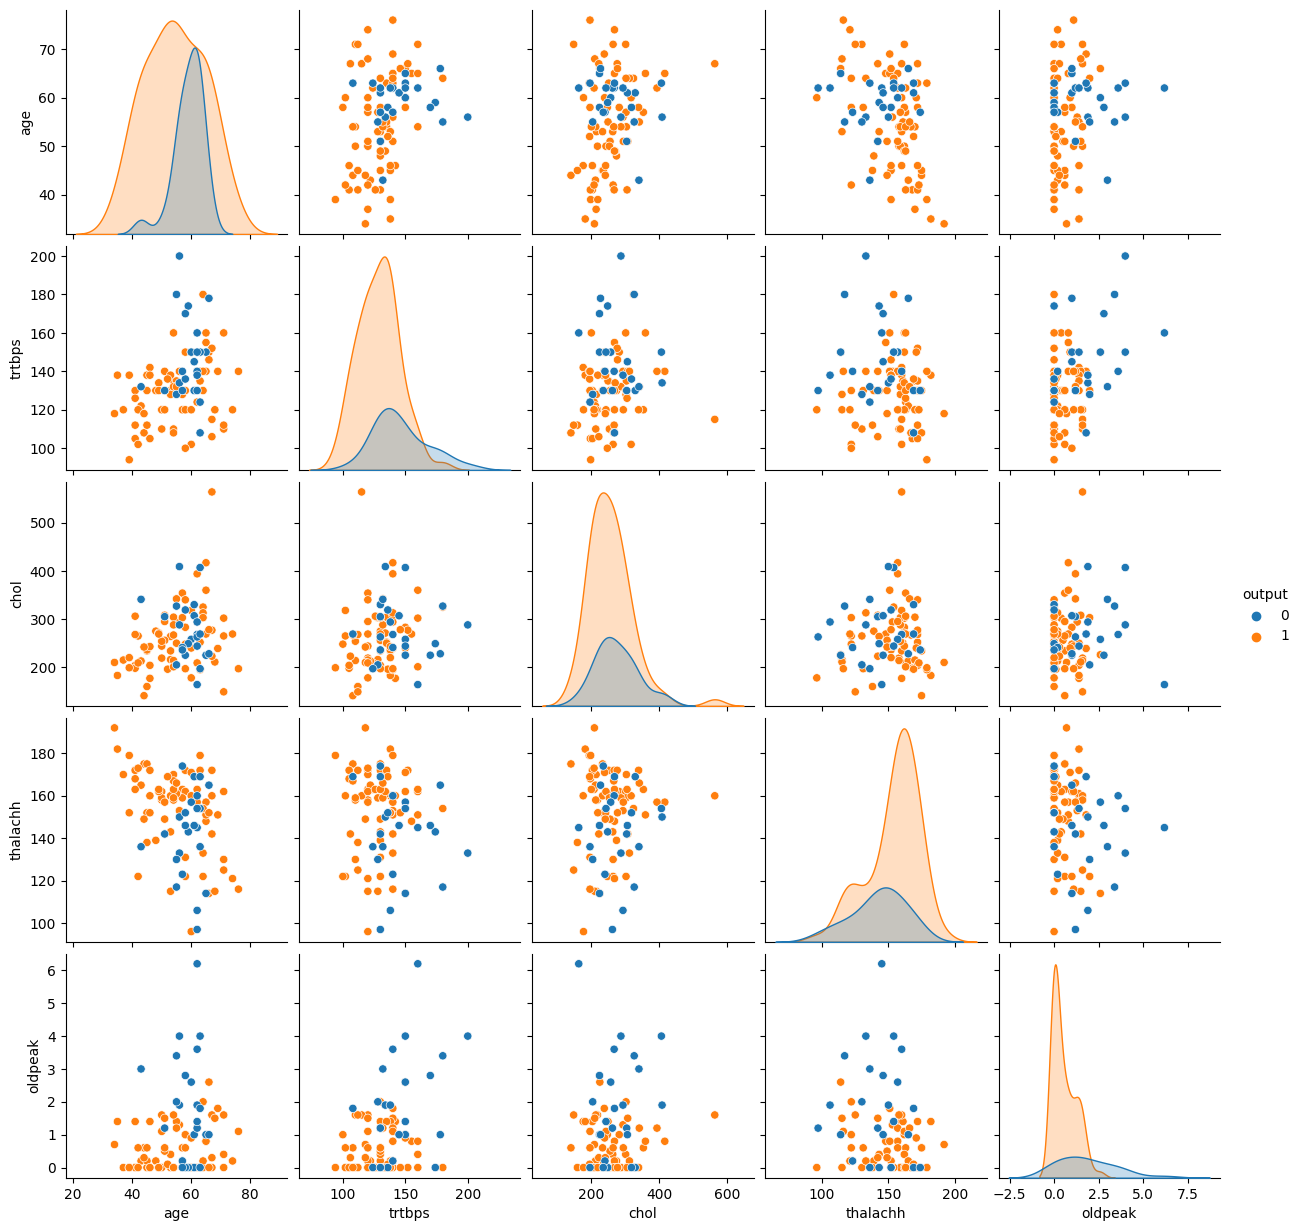

In [7]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]
women_numeric = women.loc[:, numeric_list]
sn.pairplot(women_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [8]:
women.columns

Index(['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
women.columns = ['age', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalllium', 'output']

In [10]:
women.columns

Index(['age', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type',
       'num_major_vessels', 'thalllium', 'output'],
      dtype='object')

In [11]:
women.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalllium,output
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,3,150,283,1,0,162,0,1.0,2,0,2,1


In [12]:
#changing numeric encodings to string
women.loc[women['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
women.loc[women['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
women.loc[women['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
women.loc[women['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'

women.loc[women['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'normal'
women.loc[women['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'ST-T wave abnormality'
women.loc[women['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'left ventricular hypertrophy'

#slope - st_slope_type
women.loc[women['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
women.loc[women['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
women.loc[women['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalllium
women.loc[women['thalllium'] == 0, 'thalllium'] = 'nothing'
women.loc[women['thalllium'] == 1, 'thalllium'] = 'fixed defect'
women.loc[women['thalllium'] == 2, 'thalllium'] = 'normal'
women.loc[women['thalllium'] == 3, 'thalllium'] = 'reversable defect'

In [13]:
women.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalllium,output
2,41,typical angina,130,204,0,normal,172,0,1.4,upsloping,0,normal,1
4,57,asymptomatic,120,354,0,ST-T wave abnormality,163,1,0.6,upsloping,0,normal,1
6,56,typical angina,140,294,0,normal,153,0,1.3,flat,0,normal,1
11,48,atypical angina,130,275,0,ST-T wave abnormality,139,0,0.2,upsloping,0,normal,1
14,58,non-anginal pain,150,283,1,normal,162,0,1.0,upsloping,0,normal,1


In [14]:
#creating dummy variables
women_data = pd.get_dummies(women, drop_first=False)
women_data.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'num_major_vessels', 'output', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalllium_fixed defect', 'thalllium_normal',
       'thalllium_nothing', 'thalllium_reversable defect'],
      dtype='object')

In [15]:
women_temp = women_data['thalllium_fixed defect']
women_temp2 = women_data['rest_ecg_type_ST-T wave abnormality']
women_data = pd.get_dummies(women, drop_first=True)
women_data.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,output,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalllium_normal,thalllium_nothing,thalllium_reversable defect
2,41,130,204,0,172,0,1.4,0,1,False,False,True,False,True,False,True,True,False,False
4,57,120,354,0,163,1,0.6,0,1,False,False,False,False,False,False,True,True,False,False
6,56,140,294,0,153,0,1.3,0,1,False,False,True,False,True,True,False,True,False,False
11,48,130,275,0,139,0,0.2,0,1,True,False,False,False,False,False,True,True,False,False
14,58,150,283,1,162,0,1.0,0,1,False,True,False,False,True,False,True,True,False,False


In [16]:
frames = [women_data, women_temp, women_temp2]
women_result = pd.concat(frames,axis=1)
women_result.drop('rest_ecg_type_normal',axis=1,inplace=True)
women_result.drop('thalllium_nothing',axis=1,inplace=True)
women_resultc = women_result.copy()

In [17]:
women_result.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,output,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thalllium_normal,thalllium_reversable defect,thalllium_fixed defect,rest_ecg_type_ST-T wave abnormality
2,41,130,204,0,172,0,1.4,0,1,False,False,True,False,False,True,True,False,False,False
4,57,120,354,0,163,1,0.6,0,1,False,False,False,False,False,True,True,False,False,True
6,56,140,294,0,153,0,1.3,0,1,False,False,True,False,True,False,True,False,False,False
11,48,130,275,0,139,0,0.2,0,1,True,False,False,False,False,True,True,False,False,True
14,58,150,283,1,162,0,1.0,0,1,False,True,False,False,False,True,True,False,False,False


<b>Train Test Split and Normalization</b>

In [18]:
X = women_result.drop('output', axis = 1)
Y = women_result['output']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(Y_train.shape))
print("y_test: {}".format(Y_test.shape))

X_train: (76, 18)
X_test: (20, 18)
y_train: (76,)
y_test: (20,)


In [20]:
X_train

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,st_slope_type_flat,st_slope_type_upsloping,thalllium_normal,thalllium_reversable defect,thalllium_fixed defect,rest_ecg_type_ST-T wave abnormality
110,64,180,325,0,154,1,0.0,0,False,False,False,False,False,True,True,False,False,True
142,42,120,209,0,173,0,0.0,0,True,False,False,False,True,False,True,False,False,True
11,48,130,275,0,139,0,0.2,0,True,False,False,False,False,True,True,False,False,True
258,62,150,244,0,154,1,1.4,0,False,False,False,False,True,False,True,False,False,True
115,37,120,215,0,170,0,0.0,0,True,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,58,170,225,1,146,1,2.8,2,False,False,False,False,True,False,False,False,True,False
151,71,112,149,0,125,0,1.6,0,False,False,False,False,True,False,True,False,False,True
144,76,140,197,0,116,0,1.1,0,True,False,False,True,True,False,True,False,False,False
119,46,138,243,0,152,1,0.0,0,False,False,False,False,True,False,True,False,False,False


In [21]:
numeric_list = ["age", "resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression","num_major_vessels"]

In [22]:
minMaxScaler = MinMaxScaler()
X_train[numeric_list] = minMaxScaler.fit_transform(X_train[numeric_list])

In [23]:
X_test[numeric_list] = minMaxScaler.fit_transform(X_test[numeric_list])

<b>Random Forest</b>

In [24]:
# #Create classifier with training and testing
feature_names = [f"feature {i}" for i in range(X.shape[1])]
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

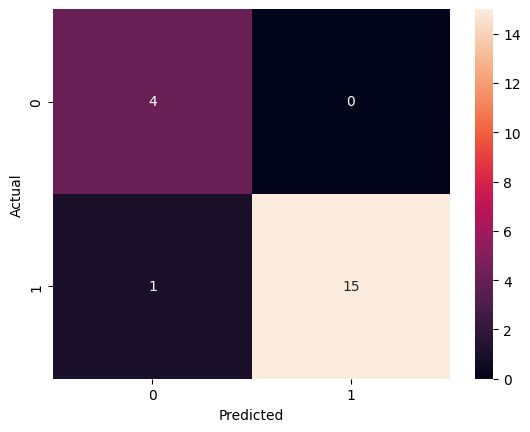

In [25]:
# plt.figure(figsize=(16, 6))
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [26]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

importances = list(clf.feature_importances_)

# # Print out the feature and importances 
print (importances)

Accuracy:  0.95
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.94      0.97        16

    accuracy                           0.95        20
   macro avg       0.90      0.97      0.93        20
weighted avg       0.96      0.95      0.95        20

[0.10799498141366587, 0.09883061759185348, 0.06832258127085553, 0.014397451283027775, 0.07653356065001832, 0.0765520851781709, 0.12935995357725258, 0.07273209378362977, 0.039952874498979656, 0.001379751484080652, 0.010691710123557624, 0.0037314664473222787, 0.02614893436869788, 0.053960818313500775, 0.08551926324314822, 0.11023887355780822, 0.002803599715785141, 0.02084938349864541]


In [27]:
# columns = X.columns
# i=0

# while i<len(columns):
#     print(f" The importance of feature '{columns[i]}' is {round(importances[i] * 100, 2)}%.")
#     i+=1

Elapsed time to compute the importances: 0.046 seconds


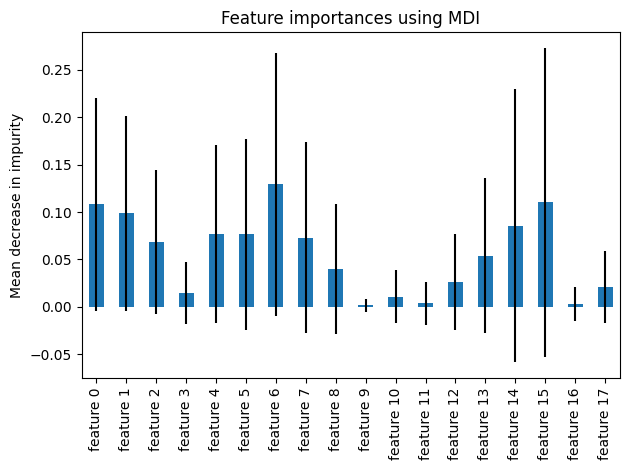

In [28]:
#feature importance
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

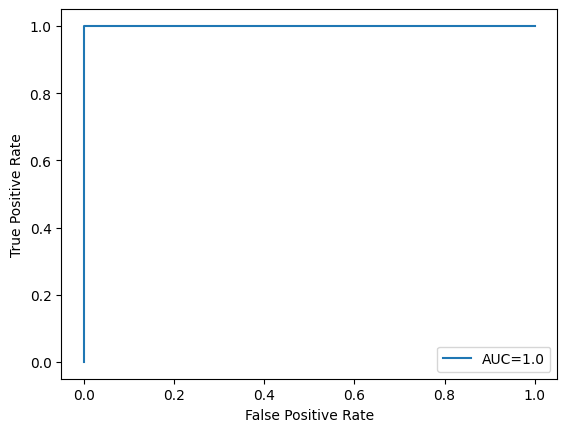

1.0

In [29]:
#define metrics
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>K-Nearest Neighbor with training, testing and normalization</b>

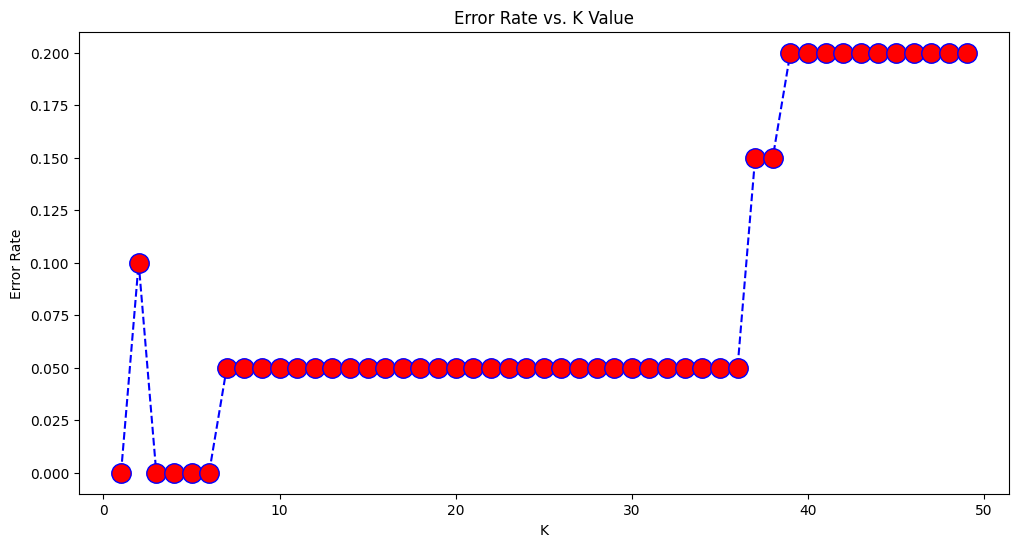

In [30]:
#Determine classifier error rate
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=14)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [31]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

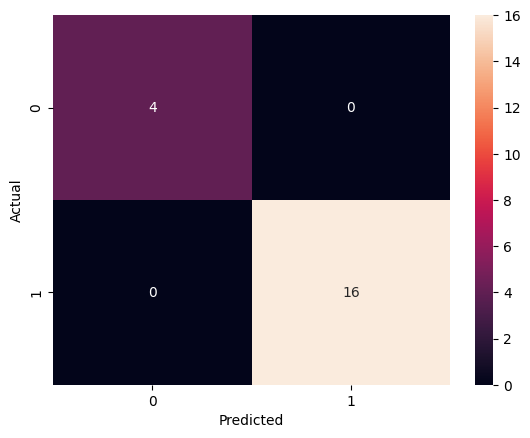

In [32]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [33]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



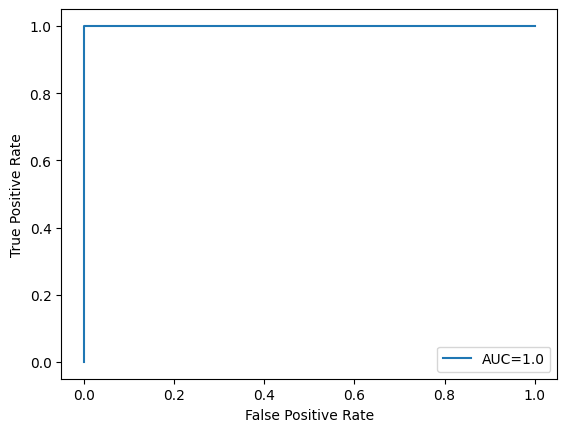

1.0

In [34]:
#define metrics
Y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Support Vector Machine using linear kernel, training/testing and normalization</b>

In [35]:
#create a classifier
clf = svm.SVC(kernel="linear", C=1.0, probability=True)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

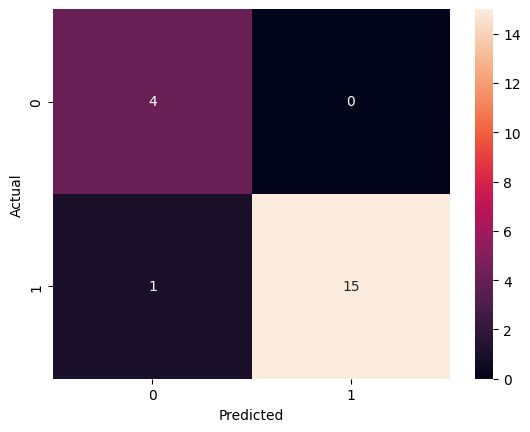

In [36]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, fmt='g')

In [37]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

Accuracy:  0.95
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.94      0.97        16

    accuracy                           0.95        20
   macro avg       0.90      0.97      0.93        20
weighted avg       0.96      0.95      0.95        20



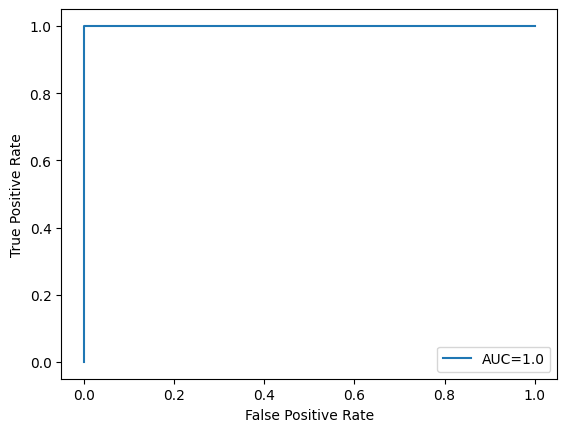

1.0

In [38]:
#define metrics
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Naive Bayes on training/testing and with normalization</b>

In [39]:
#Create classifier
nv = GaussianNB()
#Fit data
nv.fit(X_train,Y_train) 

GaussianNB()

Accuracy:  1.0


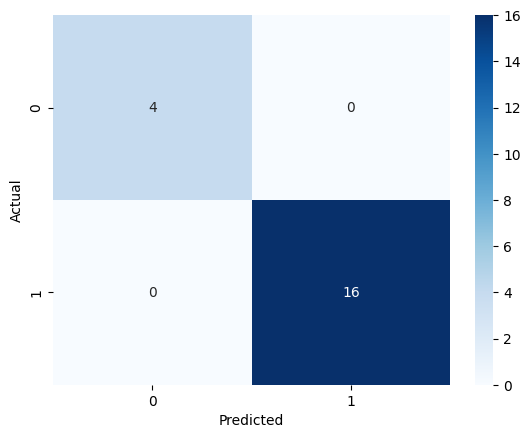

In [40]:
Y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(Y_test,Y_pred) # calculate the accuracy

# results = cross_val_score(nv, X, Y, cv=15)
# print('Cross-Validation Accuracy Scores', results)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap="Blues")

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

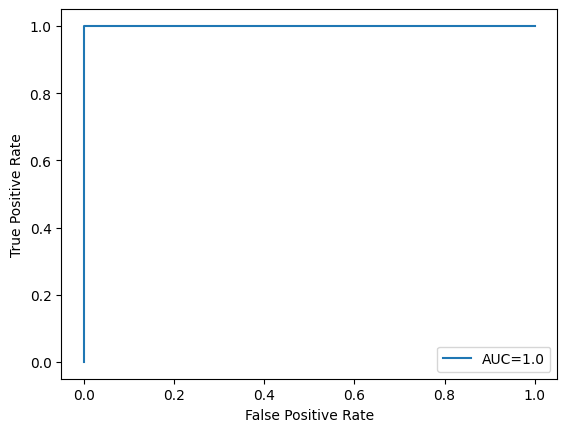

1.0

In [41]:
#define metrics
Y_pred_proba = nv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

<b>Logistic Regression with training/testing and normalization</b>

In [42]:
#Create classifier
logistic_regression= LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

In [43]:
#Cross-validation with 5 folds
results = cross_val_score(logistic_regression, X_train, Y_train, cv=14)
print('Cross-Validation Accuracy Scores', results.mean())

Cross-Validation Accuracy Scores 0.8785714285714287


<Axes: xlabel='Predicted', ylabel='Actual'>

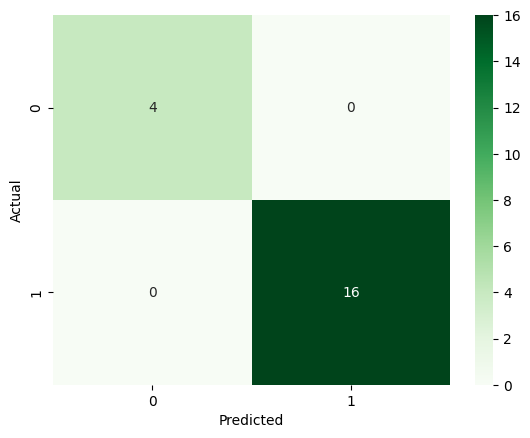

In [44]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap='Greens')

In [45]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

print(classification_report(Y_test, Y_pred))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



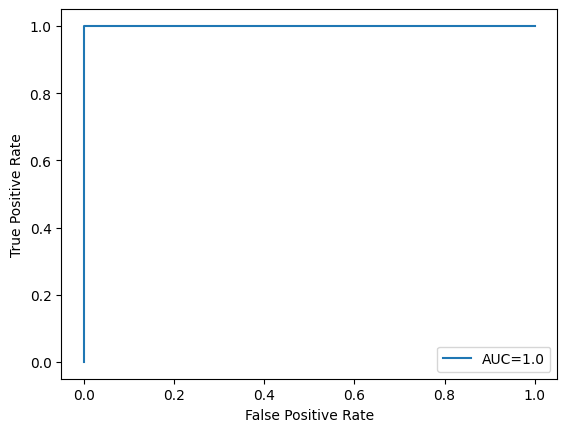

1.0

In [46]:
#define metrics
Y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

auc

In [47]:
#Coefficients
log_odds = logistic_regression.coef_[0]

print(pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef']))

                                                coef
age                                        -0.595130
resting_blood_pressure                     -0.722081
cholesterol                                 0.039521
fasting_blood_sugar                        -0.652162
max_heart_rate_achieved                     0.251786
exercise_induced_angina                    -0.968618
st_depression                              -0.463159
num_major_vessels                          -1.202649
chest_pain_type_atypical angina             1.200584
chest_pain_type_non-anginal pain            0.140702
chest_pain_type_typical angina              0.049323
rest_ecg_type_left ventricular hypertrophy -0.269681
st_slope_type_flat                         -0.338195
st_slope_type_upsloping                     0.923211
thalllium_normal                            0.935549
thalllium_reversable defect                -0.931408
thalllium_fixed defect                     -0.064099
rest_ecg_type_ST-T wave abnormality         0.

In [48]:
#Calculating odds ratio
odds = np.exp(logistic_regression.coef_[0])

print(pd.DataFrame(odds, 
             X_train.columns, 
             columns=['odds coef']))

                                            odds coef
age                                          0.551491
resting_blood_pressure                       0.485740
cholesterol                                  1.040313
fasting_blood_sugar                          0.520918
max_heart_rate_achieved                      1.286321
exercise_induced_angina                      0.379607
st_depression                                0.629293
num_major_vessels                            0.300397
chest_pain_type_atypical angina              3.322055
chest_pain_type_non-anginal pain             1.151082
chest_pain_type_typical angina               1.050559
rest_ecg_type_left ventricular hypertrophy   0.763623
st_slope_type_flat                           0.713057
st_slope_type_upsloping                      2.517361
thalllium_normal                             2.548612
thalllium_reversable defect                  0.393999
thalllium_fixed defect                       0.937912
rest_ecg_type_ST-T wave abno

In [49]:
print(logistic_regression.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logistic_regression.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[1.07228667]


,Coeffecient
chest_pain_type_atypical angina,1.200584
thalllium_normal,0.935549
st_slope_type_upsloping,0.923211
max_heart_rate_achieved,0.251786
rest_ecg_type_ST-T wave abnormality,0.177447
chest_pain_type_non-anginal pain,0.140702
chest_pain_type_typical angina,0.049323
cholesterol,0.039521
thalllium_fixed defect,-0.064099
rest_ecg_type_left ventricular hypertrophy,-0.269681


<Figure size 1000x1200 with 0 Axes>

<Axes: >

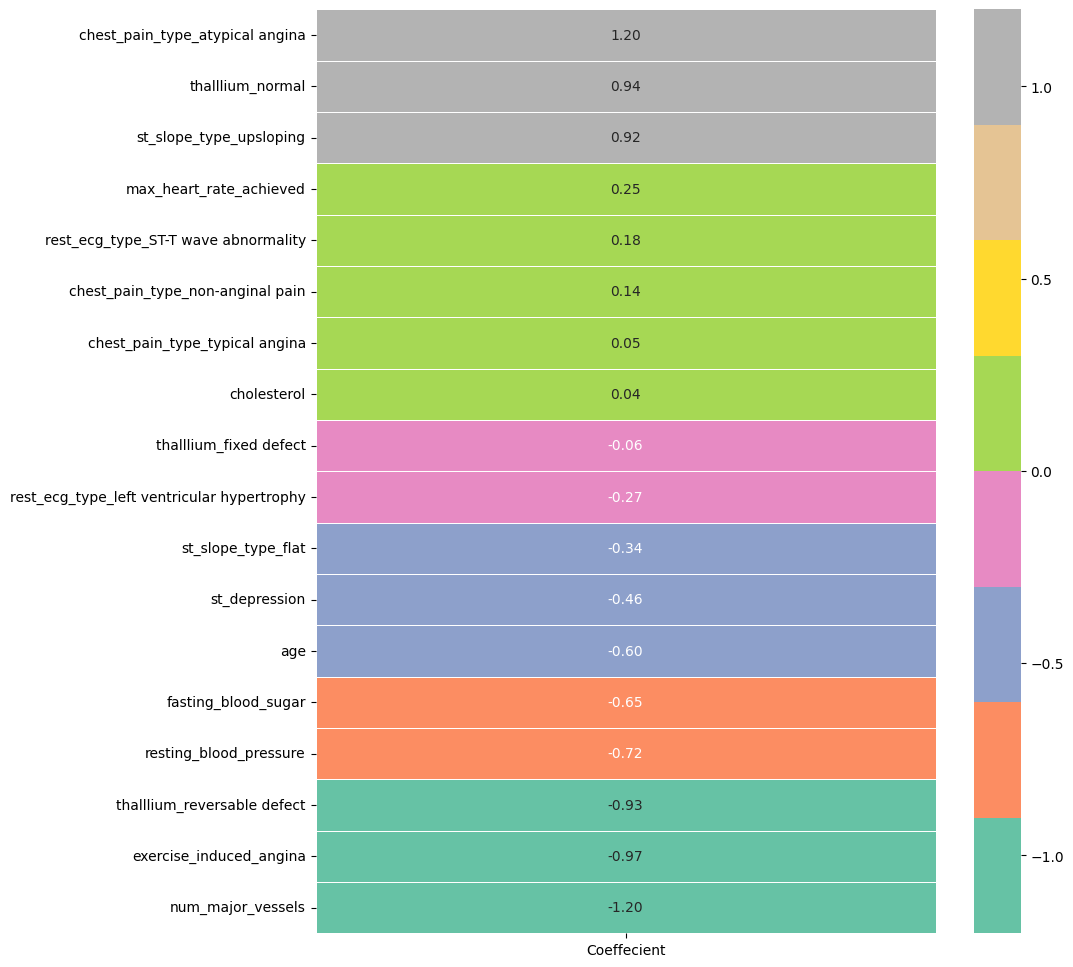

In [50]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logistic_regression.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sn.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)